In [1]:
import os
import collections
import random

import torch
import numpy as np
import scipy.misc as misc
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils import data
from torchvision import transforms
import matplotlib.patches as patches
import numpy.ma as ma
# import cv2

In [2]:
def rgb2hex(r,g,b):
    hex = "#{:02x}{:02x}{:02x}".format(r,g,b)
    return hex
def hex2rgb(hexcode):
    rgb = tuple(map(ord,hexcode[1:].decode('hex')))
    return rgb

In [3]:
# patches.Rectangle?
# plt.subplots?
# np.copy?

In [4]:
# [camvid](https://github.com/mostafaizz/camvid) 其中提供了label color的camvid图像

In [5]:
def draw_label_color():
    
    label_colours = {}
    label_colours['Sky'] = [128, 128, 128]
    label_colours['Building'] = [128, 0, 0]
    label_colours['Pole'] = [192, 192, 128]
    # Road_marking
    label_colours['Road_marking'] = [255, 69, 0]
    label_colours['Road'] = [128, 64, 128]
    label_colours['Pavement'] = [60, 40, 222]
    label_colours['Tree'] = [128, 128, 0]
    label_colours['SignSymbol'] = [192, 128, 128]
    label_colours['Fence'] = [64, 64, 128]
    label_colours['Car'] = [64, 0, 128]
    label_colours['Pedestrian'] = [64, 64, 0]
    label_colours['Bicyclist'] = [0, 128, 192]
    label_colours['Unlabelled'] = [0, 0, 0]
    
    fig, ax = plt.subplots()
    ax.set_xlim([0, 2])
    for enumerate_index, (label, colour) in enumerate(label_colours.items()):
#         print('label:', label)
#         print('colour:', colour)
        colour_r = colour[0]
        colour_g = colour[1]
        colour_b = colour[2]
        colour_hex = rgb2hex(colour_r, colour_g, colour_b)
#         print('colour_hex:', colour_hex)
        ax.add_patch(patches.Rectangle(xy=(0.1*enumerate_index,0), width=0.05, height=0.8, label=label, facecolor=colour_hex))
    ax.legend()

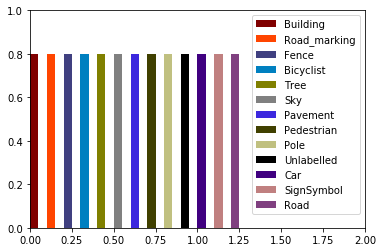

In [6]:
draw_label_color()

In [7]:
def decode_segmap(temp, plot=False):
    Sky = [128, 128, 128]
    Building = [128, 0, 0]
    Pole = [192, 192, 128]
    # Road_marking
    Road_marking = [255, 69, 0]
    Road = [128, 64, 128]
    Pavement = [60, 40, 222]
    Tree = [128, 128, 0]
    SignSymbol = [192, 128, 128]
    Fence = [64, 64, 128]
    Car = [64, 0, 128]
    Pedestrian = [64, 64, 0]
    Bicyclist = [0, 128, 192]
    Unlabelled = [0, 0, 0]

    label_colours = np.array([Sky, Building, Pole, Road, Pavement, Tree, 
                              SignSymbol, Road_marking, Car, 
                              Pedestrian, Fence, Unlabelled])

    height, width = temp.shape
    rgb = np.zeros((height, width, 3), dtype=np.uint8)
    
    for row in range(height):
        for col in range(width):
            label = temp[row, col]
            color = label_colours[label]
#             if label==0:
#                 print('label:', 0)
            rgb[row, col, :] = color
            
#     rgb = rgb/255.0
    
    if plot:
        plt.imshow(rgb)
        plt.show()
    else:
        return rgb

In [8]:
# img = misc.imread('../data/0001TP_006690_raw.png')
# img = cv2.imread('../data/0001TP_006690_raw.png', 0)
img = misc.imread(os.path.expanduser('~/Data/CamVid/trainannot/0001TP_006690.png'))

In [9]:
# img.dtype

In [10]:
np.unique(img)

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11], dtype=uint8)

In [11]:
img.shape

(360, 480)

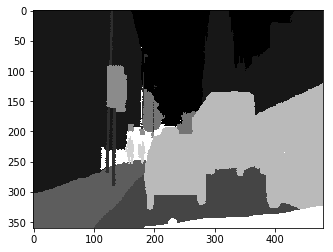

In [12]:
plt.imshow(img, cmap='gray')

In [13]:
img[230, 256]

8

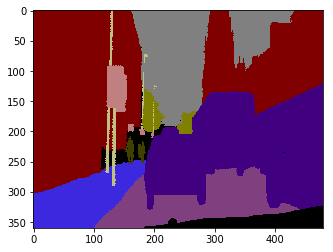

In [14]:
img_decode = decode_segmap(img)
plt.imshow(img_decode)

In [15]:
height, width = img_decode.shape[:2]

In [16]:
# img_r = img_decode[:, :, 0::3]
# img_g = img_decode[:, :, 1::3]
# img_b = img_decode[:, :, 2::3]

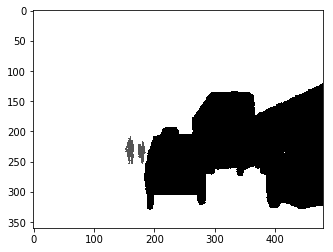

In [17]:
img_moving = np.copy(img)
# 使用循环最慢
for row in range(height):
    for col in range(width):
        img_value = img_moving[row, col]
        if img_value==8 or img_value==9:
            pass
        else:
            img_moving[row, col]=11
plt.imshow(img_moving, cmap='gray')

In [18]:
misc.imsave('moving_obj.png', img_moving)

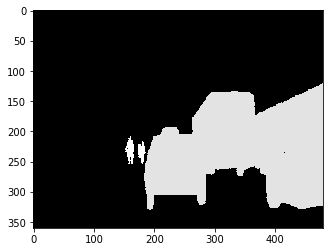

In [19]:
# 尽量不使用循环
mask_img_moving_mask = np.in1d(img, [8, 9]).reshape(height, width)
img_moving = mask_img_moving_mask * img
plt.imshow(img_moving, cmap='gray')